# 梯度下降求解逻辑回归

建立一个逻辑回归模型预测一个学生是否被大学录取. 假设你是管理员,需根据两次考试的结果决定
每个申请人的录取机会.有以前申请人的历史数据,你可以用它作为逻辑回归的训练集.对于每一个培训
例子,由两个考试的申请人的分数和录取决定.为了做到这一点,我们将建立一个分类模型,根据考试成绩估计入学概率.

即根据历史录取数据 预测之后能否被录取 分类问题

1. 读数据，看数据格式
pd.read_csv(path，header=None，names=['exam1','exam2','admitted']) 第一个参数是路径 path 可以决定可以相对  header=none 去掉原来的列名  names 指定新的列名
head 查看前几行 即书记分布
2. df.shape  查看数据的维度

3.可以使用散点图对数据的分布情况做一个展示


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pdData=pd.read_csv('./train.csv')

### sigmoid 函数

In [3]:

def sigmoid(z):
    return 1/(1+np.exp(-z))

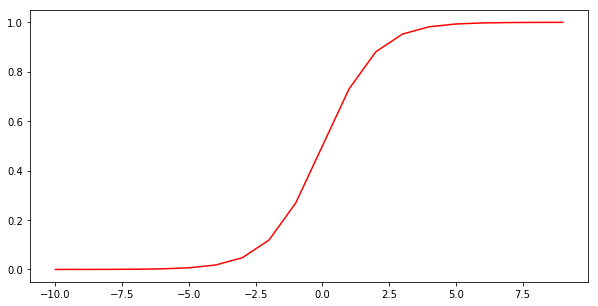

In [6]:
# 查看图像分布
nums=np.arange(-10,10,1)
fig=plt.figure(figsize=(10,5))
plt.plot(nums,sigmoid(nums),'r')

### model 返回预测结果值
即预测函数h(thelta)的表达式  即sigmoid(z) 其中z为函数输入  即thelta 的转秩* X 这个相乘的值其实就是y值

In [7]:
def model(X,thelta):
    return sigmoid(np.dot(X,thelta.T))

需要多插入一列 让这一列的数值都等于1 即规范化矩阵方程 添加x0项与thelta0 项（常数项）进行相乘

In [9]:
pdData.insert(0,'Ones',1) # 对当前df 使用insert 插入 在第0列插入1 指定列明为ones

# 构造矩阵 数据拆分
# set X(trainning data) and Y(target data)
orig_data=pdData.as_matrix()
cols=orig_data.shape[1] # 返回 数据列的数量
X=orig_data[:,0:cols-1] # 前闭后开 X
Y=orig_data[:,cols-1:cols] # Y


# theta 是我们当前的参数 因为有3个  虽然现在还没用 但是我们得进行一个占位  所以
theta=np.zeros([1,3]) # 一行3列的0 矩阵
# 然后检查一下数据

/Users/crq/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [10]:
X[:5]

array([[1, 1, 60, 'RL', 65.0, 8450, 'Pave', nan, 'Reg', 'Lvl', 'AllPub',
        'Inside', 'Gtl', 'CollgCr', 'Norm', 'Norm', '1Fam', '2Story', 7,
        5, 2003, 2003, 'Gable', 'CompShg', 'VinylSd', 'VinylSd',
        'BrkFace', 196.0, 'Gd', 'TA', 'PConc', 'Gd', 'TA', 'No', 'GLQ',
        706, 'Unf', 0, 150, 856, 'GasA', 'Ex', 'Y', 'SBrkr', 856, 854, 0,
        1710, 1, 0, 2, 1, 3, 1, 'Gd', 8, 'Typ', 0, nan, 'Attchd', 2003.0,
        'RFn', 2, 548, 'TA', 'TA', 'Y', 0, 61, 0, 0, 0, 0, nan, nan, nan,
        0, 2, 2008, 'WD', 'Normal'],
       [1, 2, 20, 'RL', 80.0, 9600, 'Pave', nan, 'Reg', 'Lvl', 'AllPub',
        'FR2', 'Gtl', 'Veenker', 'Feedr', 'Norm', '1Fam', '1Story', 6, 8,
        1976, 1976, 'Gable', 'CompShg', 'MetalSd', 'MetalSd', 'None',
        0.0, 'TA', 'TA', 'CBlock', 'Gd', 'TA', 'Gd', 'ALQ', 978, 'Unf',
        0, 284, 1262, 'GasA', 'Ex', 'Y', 'SBrkr', 1262, 0, 0, 1262, 0, 1,
        2, 0, 3, 1, 'TA', 6, 'Typ', 1, 'TA', 'Attchd', 1976.0, 'RFn', 2,
        460, 'TA', 'TA

In [13]:
Y[:5]

array([[208500],
       [181500],
       [223500],
       [140000],
       [250000]], dtype=object)

In [14]:
theta

array([[0., 0., 0.]])

## 损失函数
函数组合  损失函数定义

In [15]:
def cost(X,y,theta):
    left=np.multiply(-y,np.log(model(X,theta)))
    right=np.multiply(1-y,np.log(1-model(X,theta)))
    return np.sum(left-right)/(len(X))

In [17]:
cost(X,Y,theta)

ValueError: shapes (1460,81) and (3,1) not aligned: 81 (dim 1) != 3 (dim 0)

计算梯度

计算梯度  即所求的偏导 

In [18]:
def gradient(X,y,theta):
    grad=np.zeros(theta.shape) # theta 参数用3个  所以我们要求出3个theta 的解 所以这里的grad 梯度应分别对应3个theta 所以初始化3个 zeros 占位
    error=(model(X,theta)-y).ravel()   # 将多维数组变成1维  因为没有ravel() 之前 是一个n行1列的矩阵
    for j in range(len(theta.ravel())):
        term=np.multiply(error,X[:,j])
        grad[0,j]=np.sum(term)/len(X)
    return grad

### Gradient decent
确定了梯度 即确定了更新方向 

接下来 比较3种不同梯度下降方法 

In [19]:
STOP_ITER=0 # 按照迭代次数进行停止
STOP_COST=1 # 根据损失值目标函数的变换 即观察cost function 如果带带前后两次的值差别buda 即停止迭代
STOP_GRAD=2 # 根据梯度 如果前后两次梯度变化特别小 停止迭代

def stopCriterion(type,value,threshold):
    # 设定三种不同的停止策略：
    if type==STOP_ITER: return value>threshold
    elif type==STOP_COST: return abs(value[-1]-value[-2])<threshold
    elif type==STOP_GRAD: 
        return np.linalg.norm(value)<threshold # np.linalg.norm  求范数 

In [20]:
# 洗牌 将数据打乱 目前的数据可能是有规律的 所以先将数据打乱
def shuffleData(data):
    np.random.shuffle(data) # numpy 中提供了shuffle 这个函数
    cols=data.shape[1]
    X=data[:,0:cols-1]
    y=data[:,cols-1:cols]
    return X,y
    

In [21]:
import time
# 不同的梯度下降算法 所用的时间是不一样的 所以这里我们看一下时间的大小
# 将所有所涉及的参数传入 batchSize  迭代方式
# 该函数主要功能 是参数更新  即theta=theta-alpha * 梯度 在一定的迭代次数停止 定义阀值 用于作比较
def descent(data,theta,batchSize,stopType,thresh,alpha):
    # 梯度下降求解
    
    init_time=time.time()
    
    i=0 # 迭代次数
    k=0 # batch
    
    X,y=shuffleData(data)
    grad=np.zeros(theta.shape) # 计算的梯度
    costs=[cost[X,y,theta]] # 损失值 用于第二种停止策略
    while True:
        grad=gradient(X[k:k+batchSize],y[k:k+batchSize],theta) # 求出各个theta 参数的下降方向
        k+=batchSize # 取batch 个数据  批量梯度下降 传入所有样本个数 随机 每一传一个 
        # 小批量  选取一部分 比如说10个
        if k>=n:
            
            k=0
            X,y=shuffleData(data) # 重新洗牌
        theta=theta-alpha*grad  # 参数更新
        costs=[cost[X,y,theta]] # 计算新的损失
        i+=1
        if stopType ==STOP_ITER: value=i
        elif stopType==STOP_COST: value=costs
        elif stopType==STOP_GRAD: value=grad
        if stopCriterion(stopType,value,thresh): break # 如果符合条件 则完成了迭代 退出
    return theta,i-1,costs,grad,time.time()-init_time
    

In [22]:
# 启动函数 
def runExpe(data,theta,batchSize,stopType,thresh,alpha):
    theta,iter,costs,grad,dur=descent(data,theta,batchSize,stopType,thresh,alpha)
    # 参数定义等....
    name ='Original' if(data[:,1]>2).sum()>1 else 'Scaled' 
    name+='data-learning rate:{} -'.format(alpha)
    
    if batchSize==n:    strDescType ='Gradient'
    elif batchSize==1:  strDescType='Stochasitic'
    else: strDescType='Mini-batch ({})'.format(batchSize)
    
    name +=strDescType +'descent -stop:'
    
    if stopType ==STOP_ITER: strStop='{} iterations'.format(thresh)
    elif stopType ==STOP_COST: strStop ='costs change < {}'.format(thresh)
    else: strStop='gradient norm < {}'.format(thresh)
    
    name +=strStop
    
    print('***{} \n Theta: {} - Iter: {} - Last cost :{.03.2f} - Duration: {:03.2f}s'
          .format(name,theta,iter,costs[-1],dur))
    
    # 画图
    fig,ax=plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)),costs,'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper()+' - Error vs . Iteration')
    return theta

In [23]:
# 选择的梯度下降方法 是基于所有样本的

n=100
runExpe(orig_data,theta,n,STOP_ITER,thresh=5000,alpha=0.000001)

TypeError: 'function' object is not subscriptable